based on veritasium video that randomness is pure information because it has highest entropy
- so if you reduce dimensionality down to a random matrix, can you increase dimensionality from random matrix?

syncopated pattern: `1n11nn` where '1' is redundant and n is a random, 'pure information' number

starts at an offset in next row e.g. `n1n11nnnn`
how to make purely random/high entropy matrix with 1s and 0s?

How to make pictures with tesselations that aren't just diagonal? what about scale free distributions? 

*What is the general theory behind creating a function/dynamical system that given a random matrix input, outputs a lower entropy, but same size (in dimensions) image?*
approaches:
- shuffling the matrix: what do trajectories look like in 3d space?
- applying function to each pixel in matrix
- difference between the above two

# todo
- use entropy formula

cool ones 
```
'10110011100011110000'
'10110011100011110000111000110010'
'100000110000111000111100111110' < this with size 400
'11000111100010010101111110000001011010010101001010101111010101010101011001111111111' size 1k, figsize large

```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

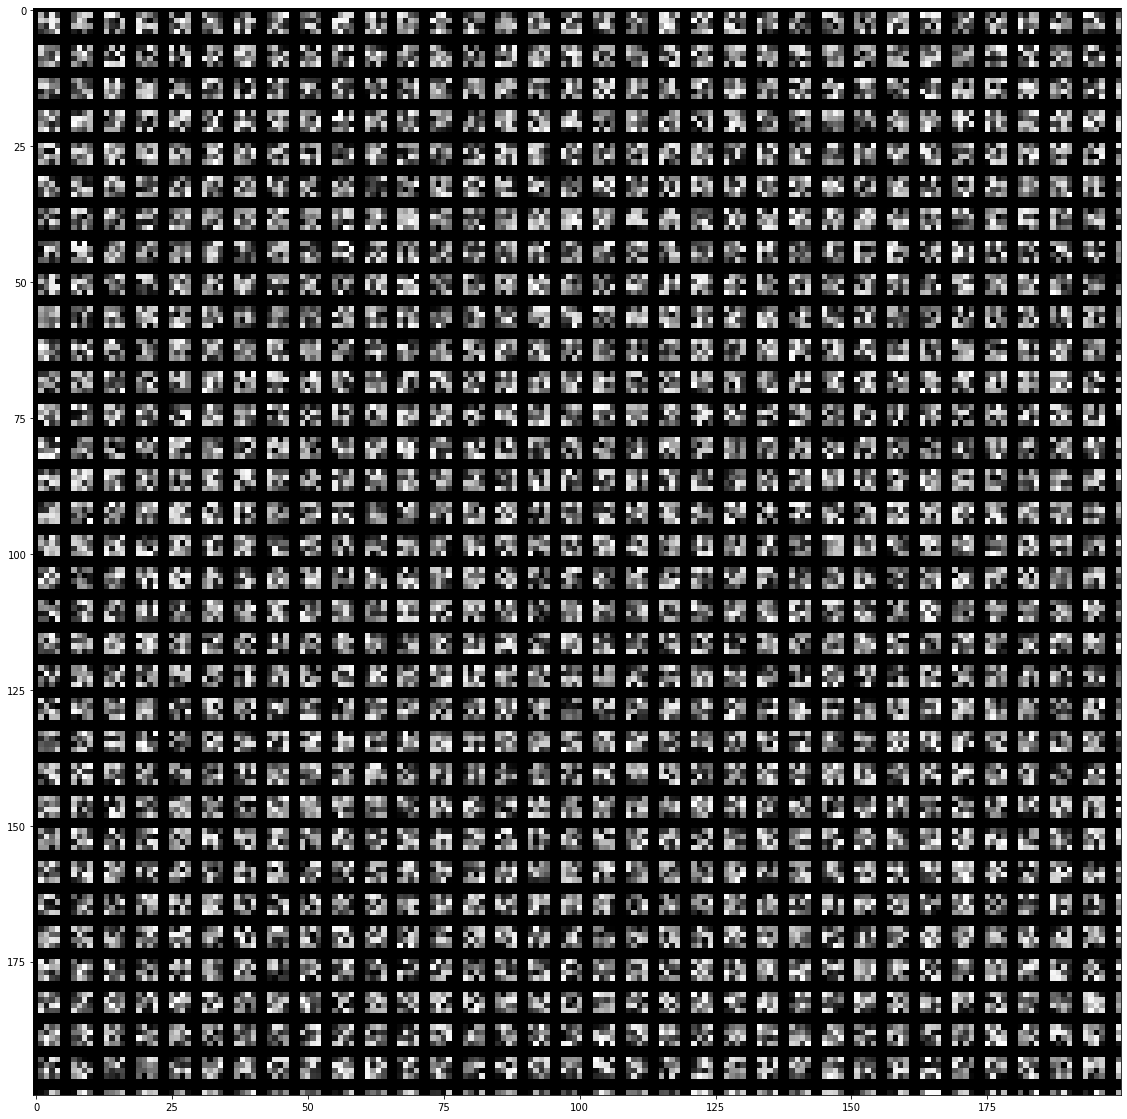

In [158]:
from itertools import 
rmat = np.random.random(size=(200,200))
# cpg = list(combinations(range(19), 2)) #central pattern generator
def rotate(s,direction):
    if direction == '>':
        return s[-1]+s[:-1]
    elif direction == '<':
        return s[1:]+s[0]

#technically want to insert it between random numbers but overwriting it 
# should do the same thing
pat = '011110010101'
pats = ['00001000',
        '00011000',
        '00111000',
        '01111000',
       '11111111']
pats= ['00000','10101','11111','11100']
pats = ['111111','100001','100001','100001','100001','111111']
def draw_repeater(pats, alternate=False):
    x = len(pats)
    if isinstance(pats, str):
        # so it can be updated recursively
        pat = pats
 
    new_mat = []
    for e, row in enumerate(rmat):
        if alternate:
            if e%altermate==0:
                pat = rotate(pat,'>')
            else:
                pat = rotate(pat,'<')
        if not alternate and isinstance(pats, str):
            pat = rotate(pat,'>')
            
        if isinstance(pats, list):
            pat = pats[e%x]
        
        row_copy = row.copy() #to be overwritten
        for i, el in enumerate(row):
            curr = pat[i%x]
            if curr == '0':
                row_copy[i] = el
            else:
                row_copy[i] = 1

        new_mat.append(row_copy)

    plt.figure(figsize=(20,20))
    plt.imshow(new_mat, cmap='gray_r')
    return new_mat

mat = draw_repeater(pats)

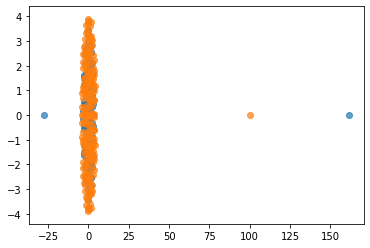

In [169]:
w,v = np.linalg.eig(mat)
reals, ims = [i.real for i in w], [i.imag for i in w]
plt.scatter(reals, ims, alpha=0.7)

w,v = np.linalg.eig(rmat)
reals, ims = [i.real for i in w], [i.imag for i in w]
plt.scatter(reals, ims, alpha=0.7)

# Coarse graining

algorithm: start with random matrix, then coarse grain over increasingly sized grids and compare eigenvalue decomposition (also of covariance matrix)
- compare majority, average, decimation, and finally random sample rule
- do this on images for fun too
    - tangential shuffle images and try to reshuffle back to original with algorithmic compression

use entropy formula

In [ ]:
rmat = np.random.random(size=(500,500))

def coarse_grain(mat, method='avg', sizes=None):
    """
    mat: 2d *square* matrix (for now)
    method: avg, vote, or decimation
    sizes: tbd
    """
    w = len(mat)
    for res in  

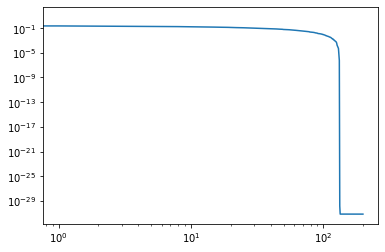

In [179]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(mat)
es = pca.explained_variance_
plt.loglog(es)

Looks like a fake alphabet!

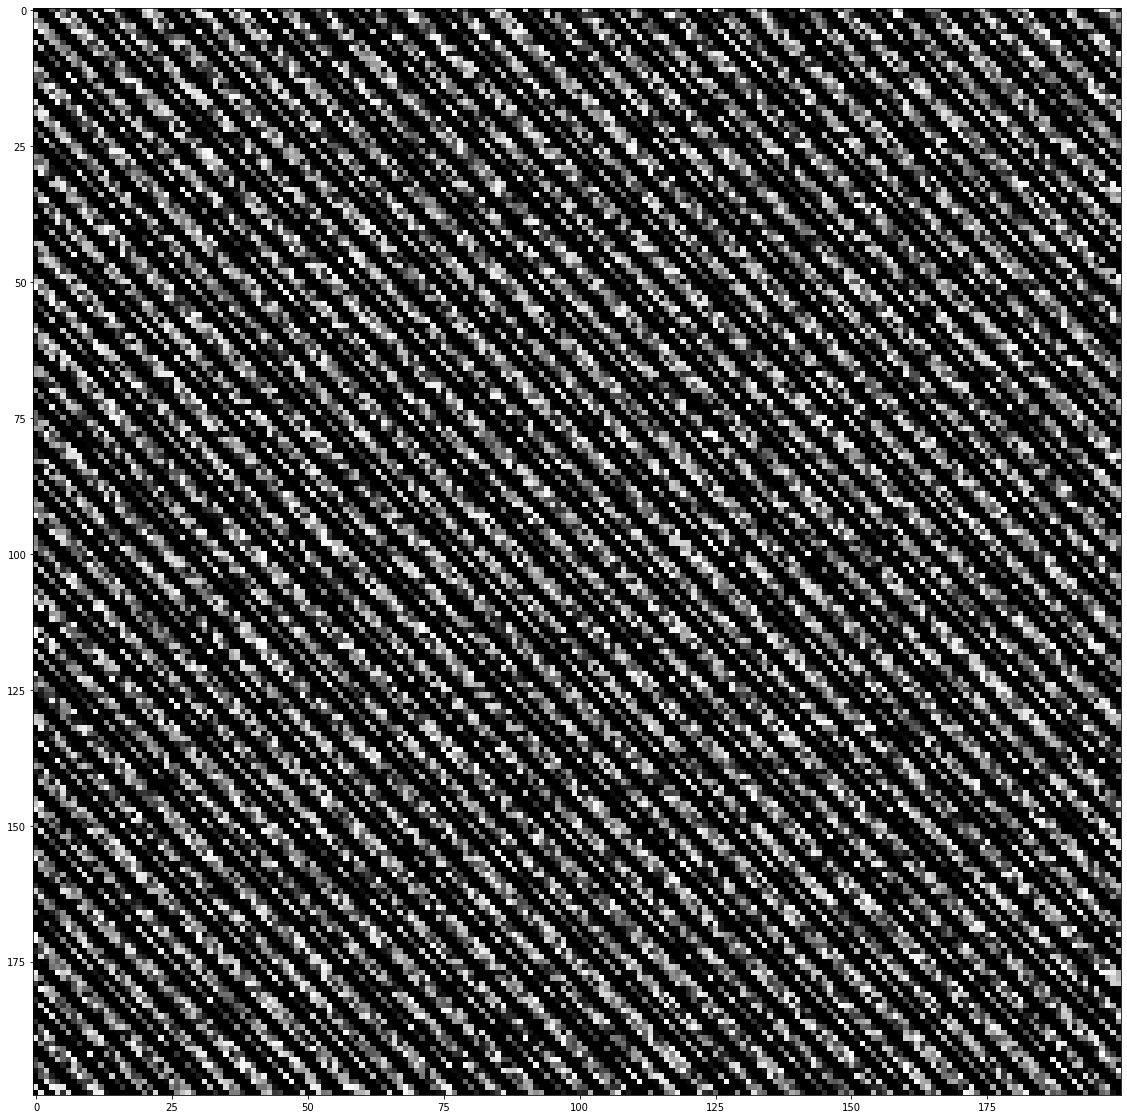

In [146]:
draw_repeater('1100001110110001')